<h1>Chapter 05. Support Vector Machine - SVM</h1>

Support Vector Machines (SVM) are supervised learning models used for classification and regression analysis. In classification tasks, SVM finds a hyperplane that best separates data points into different classes by maximizing the margin between the classes.

<h2>Linear SVM Classification</h2>

Linear SVM: Maximizing Class Separation with a Straight Line

Large margin classification

In [1]:
from sklearn.svm import SVC
from sklearn import datasets


iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]  # petal length, petal width
y = iris['target']

setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

# SVM Classifier model
svm_clf = SVC(kernel='linear', C=1e9)
svm_clf.fit(X, y)

SVC(C=1000000000.0, kernel='linear')

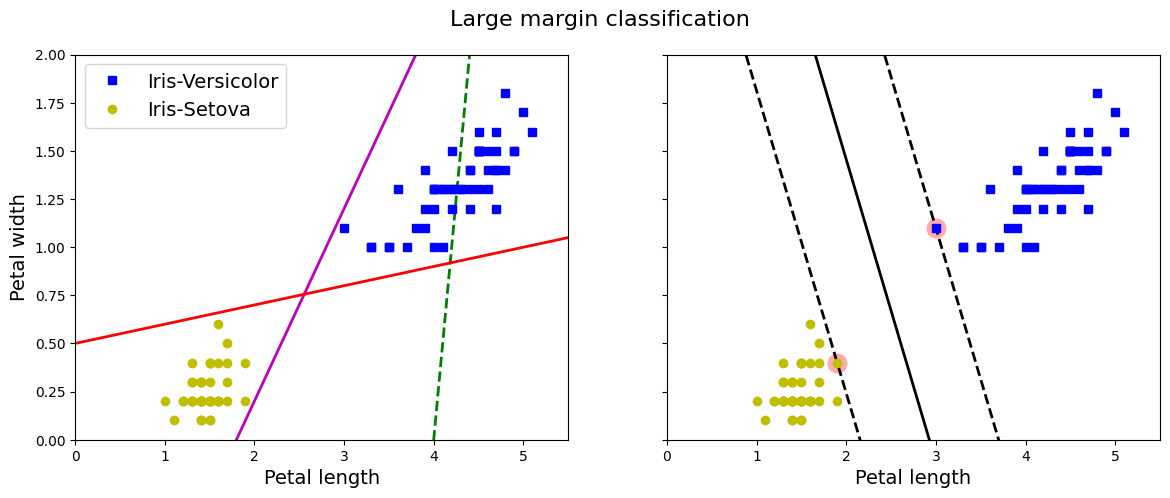

In [2]:
import numpy as np
import matplotlib.pyplot as plt


# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5 * x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1 * x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0 * x0 + w1 * x1 + b = 0
    # => x1 = -w0 / w1 * x0 - b / w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1 / w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(
        svs[:, 0],
        svs[:, 1],
        s=180,
        facecolors='#FFAAAA'
    )
    plt.plot(
        x0,
        decision_boundary,
        'k-',
        linewidth=2
    )
    plt.plot(
        x0,
        gutter_up,
        'k--',
        linewidth=2
    )
    plt.plot(
        x0,
        gutter_down,
        'k--',
        linewidth=2
    )

fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

plt.sca(axes[0])
plt.plot(
    x0,
    pred_1,
    'g--',
    linewidth=2
)
plt.plot(
    x0,
    pred_2,
    'm-',
    linewidth=2
)
plt.plot(
    x0,
    pred_3,
    'r-',
    linewidth=2
)
plt.plot(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    'bs',
    label='Iris-Versicolor'
    
)
plt.plot(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    'yo',
    label='Iris-Setova'
)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf=svm_clf, xmin=0, xmax=5.5)
plt.plot(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    'bs'
)
plt.plot(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    'yo'
)
plt.xlabel('Petal length', fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.figtext(
    x=0.5,
    y=0.95,
    s='Large margin classification',
    fontsize=16,
    ha='center',
    va='center'
)
plt.show()

Sensivity to feature scales

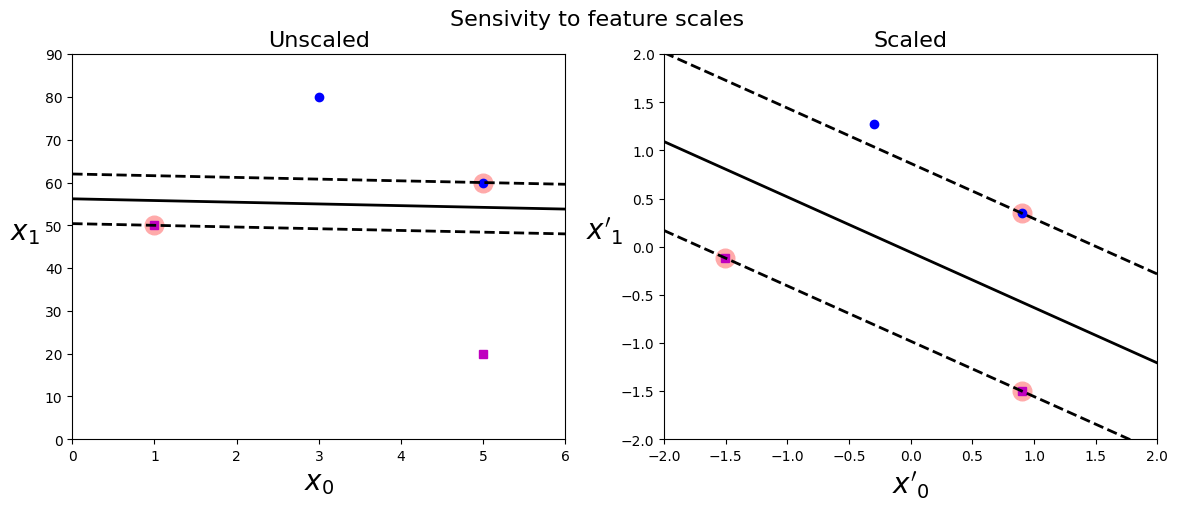

In [3]:
from sklearn.preprocessing import StandardScaler


Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.plot(
    Xs[:, 0][ys == 1],
    Xs[:, 1][ys == 1],
    'bo'
)
plt.plot(
    Xs[:, 0][ys == 0],
    Xs[:, 1][ys == 0],
    'ms'
)
plot_svc_decision_boundary(svm_clf=svm_clf, xmin=0, xmax=6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$    ', fontsize=20, rotation=0)
plt.title('Unscaled', fontsize=16)
plt.axis([0, 6, 0, 90])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

plt.subplot(122)
plt.plot(
    X_scaled[:, 0][ys == 1],
    X_scaled[:, 1][ys == 1],
    'bo'
)
plt.plot(
    X_scaled[:, 0][ys == 0],
    X_scaled[:, 1][ys == 0],
    'ms'
)
plot_svc_decision_boundary(svm_clf=svm_clf, xmin=-2, xmax=2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$   ", fontsize=20, rotation=0)
plt.title('Scaled', fontsize=16)
plt.axis([-2, 2, -2, 2])
plt.figtext(
    x=0.5,
    y=0.95,
    s='Sensivity to feature scales',
    fontsize=16,
    ha='center',
    va='center'
)
plt.show()

<h3>Soft Margin Classification</h3>

Soft Margin Classification balances margin width and classification errors by introducing a parameter 'C' to allow some misclassifications for improved generalization.

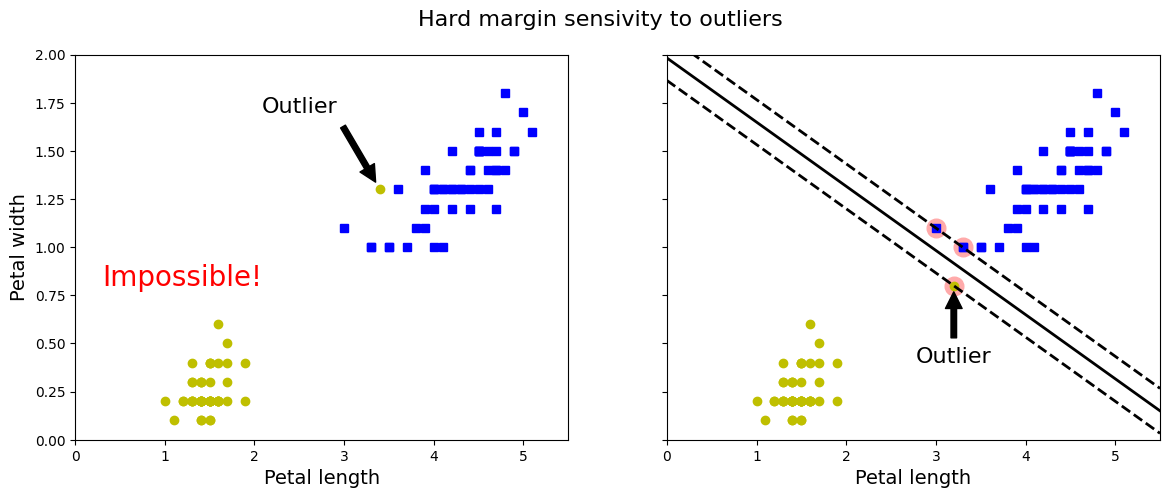

In [4]:
X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis=0)
yo1 = np.concatenate([y, y_outliers[:1]], axis=0)
Xo2 = np.concatenate([X, X_outliers[1:]], axis=0)
yo2 = np.concatenate([y, y_outliers[1:]], axis=0)

svm_clf2 = SVC(kernel='linear', C=10**9)
svm_clf2.fit(Xo2, yo2)

fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

plt.sca(axes[0])
plt.plot(
    Xo1[:, 0][yo1 == 1],
    Xo1[:, 1][yo1 == 1],
    'bs'
)
plt.plot(
    Xo1[:, 0][yo1 == 0],
    Xo1[:, 1][yo1 == 0],
    'yo'
)
plt.text(
    x=0.3,
    y=0.8,
    s='Impossible!',
    fontsize=20,
    color='red'
)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.annotate(
    'Outlier',
    xy=(X_outliers[0][0], X_outliers[0][1]),
    xytext=(2.5, 1.7),
    ha='center',
    arrowprops={'facecolor': 'black', 'shrink': 0.1},
    fontsize=16
)
plt.axis([0, 5.5, 0, 2])

plt.sca(axes[1])
plt.plot(
    Xo2[:, 0][yo2 == 1],
    Xo2[:, 1][yo2 == 1],
    'bs'
)
plt.plot(
    Xo2[:, 0][yo2 == 0],
    Xo2[:, 1][yo2 == 0],
    'yo'
)
plot_svc_decision_boundary(svm_clf=svm_clf2, xmin=0, xmax=5.5)
plt.xlabel('Petal length', fontsize=14)
plt.annotate(
    'Outlier',
    xy=(X_outliers[1][0], X_outliers[1][1]),
    xytext=(3.2, 0.4),
    ha='center',
    arrowprops={'facecolor': 'black', 'shrink': 0.1},
    fontsize=16
)
plt.axis([0, 5.5, 0, 2])
plt.figtext(
    0.5,
    0.95,
    'Hard margin sensivity to outliers',
    ha='center',
    va='center',
    fontsize=16
)
plt.show()

In [5]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC


X = iris['data'][:, (2, 3)]  # petal length, petal width
y = (iris['target'] == 2).astype(np.float64)  # Iris-Virginica

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge', dual='auto', random_state=42))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=1, dual='auto', loss='hinge', random_state=42))])

In [6]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [7]:
scaler = StandardScaler()
svm_clf1 = LinearSVC(
    C=1,
    loss='hinge',
    dual='auto',
    max_iter=10000,
    random_state=42
)
svm_clf2 = LinearSVC(
    C=100,
    loss='hinge',
    dual='auto',
    max_iter=10000,
    random_state=42
)

scaled_svm_clf1 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf1)
])
scaled_svm_clf2 = Pipeline([
    ('scaler', scaler),
    ('linear_svc', svm_clf2)
])

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, dual='auto', loss='hinge', max_iter=10000,
                           random_state=42))])

In [8]:
# Convert to unscaled parameters
b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_

svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])

# Find support vectors (LinearSVC does not do this automatically)
t = y * 2 - 1
support_vector_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vector_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vector_idx1]
svm_clf2.support_vectors_ = X[support_vector_idx2]

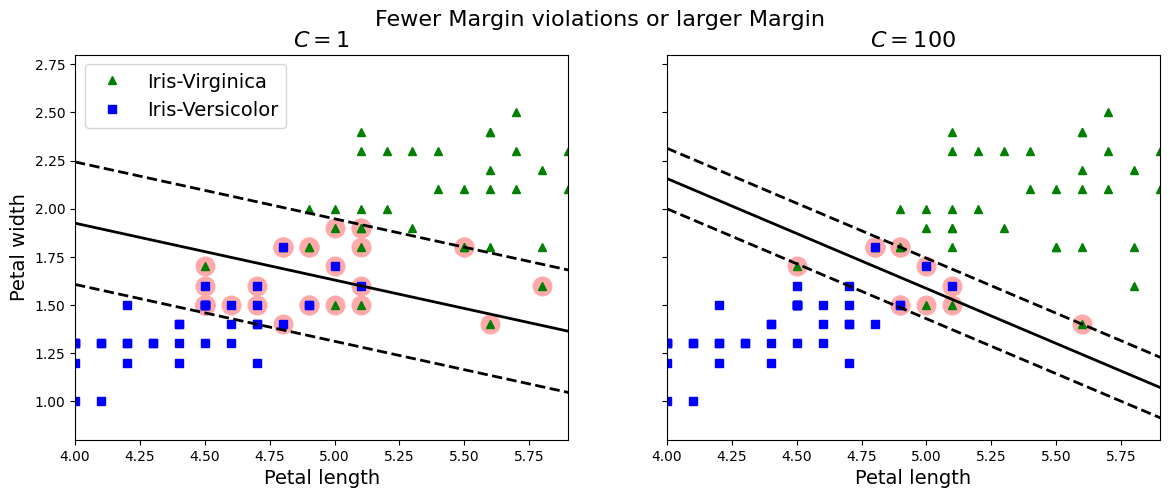

In [9]:
fig, axes = plt.subplots(ncols=2, figsize=(14, 5), sharey=True)

plt.sca(axes[0])
plt.plot(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    'g^',
    label='Iris-Virginica'
)
plt.plot(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    'bs',
    label='Iris-Versicolor'
)
plot_svc_decision_boundary(svm_clf=svm_clf1, xmin=4, xmax=5.9)
plt.xlabel('Petal length', fontsize=14)
plt.ylabel('Petal width', fontsize=14)
plt.legend(loc='upper left', fontsize=14)
plt.title(f"$C = {svm_clf1.C}$", fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])

plt.sca(axes[1])
plt.plot(
    X[:, 0][y == 1],
    X[:, 1][y == 1],
    'g^'
)
plt.plot(
    X[:, 0][y == 0],
    X[:, 1][y == 0],
    'bs'
)
plot_svc_decision_boundary(svm_clf=svm_clf2, xmin=4, xmax=5.99)
plt.xlabel('Petal length', fontsize=14)
plt.title(f"$C = {svm_clf2.C}$", fontsize=16)
plt.axis([4, 5.9, 0.8, 2.8])
plt.figtext(
    0.5,
    0.95,
    'Fewer Margin violations or larger Margin',
    va='center',
    ha='center',
    fontsize=16
)
plt.show()